<a href="https://colab.research.google.com/github/sandaruwan9495/Mnist_Classifire_With_Keras-/blob/master/MNIST_Classifire_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preproccessing and create the architecture of the model...**

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

np.random.seed(0)

(X_Train, Y_Train), (X_Test, Y_Test) = mnist.load_data()
num_of_samples = []
cols = 5
clases = 10

Y_Train = to_categorical(Y_Train, 10)
Y_Test = to_categorical(Y_Test, 10)

X_Train = X_Train/255
X_Test = X_Test/255

num_of_pixels = 784
X_Train = X_Train.reshape(X_Train.shape[0], 28, 28, 1)
X_Test = X_Test.reshape(X_Test.shape[0], 28, 28, 1)

def create_only_fully_connected_model():
    model = Sequential()
    model.add(Dense(units=10, activation="relu", input_dim=num_of_pixels))
    model.add(Dense(units=10, activation="relu"))
    model.add(Dense(units=clases, activation="softmax"))
    model.compile(Adam(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    return model
def create_lenet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=500, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(units=clases, activation="softmax"))
    model.compile(Adam(0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    return model
print("Data preproccessing and architecture is ready....")

Data preproccessing and architecture is ready....


# **Create the Model**







In [62]:
model = create_lenet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
__________

#  Train the model with the dataset

In [63]:
history = model.fit(x=X_Train, y=Y_Train, epochs=10, validation_split=0.1, batch_size=400, shuffle=True, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.2493 - acc: 0.9192 - val_loss: 0.0486 - val_acc: 0.9862
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0696 - acc: 0.9782 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0419 - val_acc: 0.9882
Epoch 4/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0532 - acc: 0.9835 - val_loss: 0.0355 - val_acc: 0.9905
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0429 - acc: 0.9863 - val_loss: 0.0336 - val_acc: 0.9903
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0328 - val_acc: 0.9917
Epoch 7/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0406 - acc: 0.9873 - val_loss: 0.0359 - val_acc:

# **Evaluate the model capacity**

Text(0.5, 0, 'epochs')

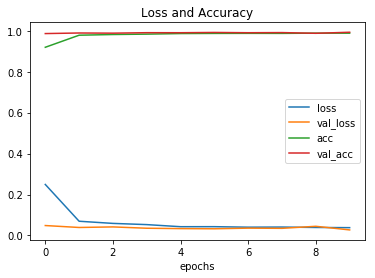

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.title("Loss and Accuracy")
plt.xlabel("epochs")

# **Test the model with some random image**

Predicted digit is: 2


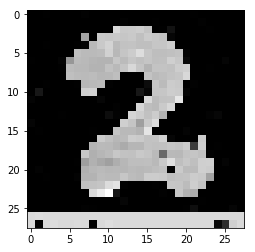

In [65]:
import requests
from PIL import Image

url = "https://c8.alamy.com/comp/HXBRW0/2-red-handwritten-digits-over-white-background-HXBRW0.jpg"
response = requests.get(url, stream = True)
img = Image.open(response.raw)

import cv2
img = np.asanyarray(img)
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap("gray"))
img = img/255
img = img.reshape(1, 28, 28, 1)

prediction = model.predict_classes(img)
print("Predicted digit is:", str(prediction[0]))



# **Check the model capacity with all test data**

In [66]:
score = model.model.evaluate(X_Test, Y_Test, verbose=0)
print("Test Score: ", score[0])
print("Test Accuracy: ", score[1])

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:110: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Test Score:  0.02892212936879605
Test Accuracy:  0.9908


# **Visualize the feature maps**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("co...)`
  


(1, 24, 24, 30)
(1, 10, 10, 15)


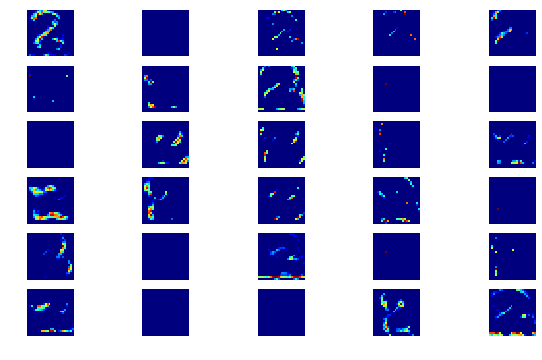

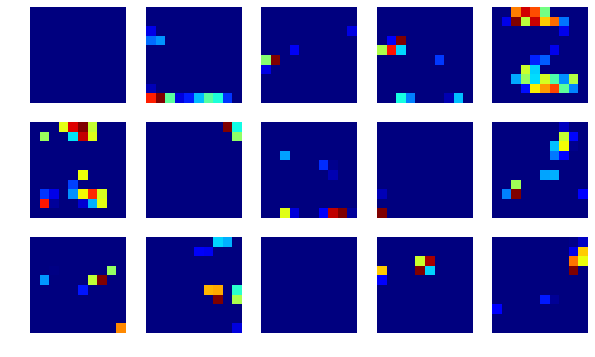

In [67]:
layer1 = Model(input=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(input=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap("jet"))
  plt.axis("off")

plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap("jet"))
  plt.axis("off")